In [1]:
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, precision_score, recall_score, roc_auc_score  
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from random import randint
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
Data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
print("DataFRAME Details")
print("Total Rows:{}\nTotal Columns: {}".format(Data.shape[0],Data.shape[1]))

Data.head()

DataFRAME Details
Total Rows:5110
Total Columns: 12


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
Data.isnull().sum().sort_values(ascending=False)[:5]

bmi                  201
stroke                 0
smoking_status         0
avg_glucose_level      0
Residence_type         0
dtype: int64

In [5]:
bmi = round(Data['bmi'].mean(),1)
Data['bmi'].fillna(bmi, inplace = True)

In [6]:
Data['age'].fillna(0,inplace=True)
bins = [0,18,36,54,72,90]
labels = ['0-18','18-36','36-54','54-72','72-90']
Data['age'] = pd.cut(Data['age'], bins=bins, labels=labels)
Data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,54-72,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,54-72,0,0,Yes,Self-employed,Rural,202.21,28.9,never smoked,1
2,31112,Male,72-90,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,36-54,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,72-90,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Below is the list of variety of color palette that can be used while creation visuals

In [7]:
colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap',
          'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
          'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
          'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
          'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 
          'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 
          'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 
          'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
          'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 
          'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 
          'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 
          'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 
          'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 
          'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 
          'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 
          'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 
          'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

# Data Visualization

In [8]:
StrokeAnalysis = Data.copy()
StrokeAnalysis['hypertension'] = StrokeAnalysis['hypertension'].apply(lambda x : 'Hypertension' if x == 1 else 'No Hypertension') 
StrokeAnalysis['heart_disease'] = StrokeAnalysis['heart_disease'].apply(lambda x : 'Heart Disease' if x == 1 else 'No Heart Disease') 
StrokeAnalysis['stroke'] = StrokeAnalysis['stroke'].apply(lambda x : 'Suffered Stroke' if x == 1 else 'Never Suffered Stroke') 
StrokeAnalysis['ever_married'] = StrokeAnalysis['ever_married'].apply(lambda x : 'Married' if x == 'Yes' else 'Unmarried') 

StrokeAnalysis.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,54-72,No Hypertension,Heart Disease,Married,Private,Urban,228.69,36.6,formerly smoked,Suffered Stroke
1,51676,Female,54-72,No Hypertension,No Heart Disease,Married,Self-employed,Rural,202.21,28.9,never smoked,Suffered Stroke
2,31112,Male,72-90,No Hypertension,Heart Disease,Married,Private,Rural,105.92,32.5,never smoked,Suffered Stroke
3,60182,Female,36-54,No Hypertension,No Heart Disease,Married,Private,Urban,171.23,34.4,smokes,Suffered Stroke
4,1665,Female,72-90,Hypertension,No Heart Disease,Married,Self-employed,Rural,174.12,24.0,never smoked,Suffered Stroke


Text(0, 0.5, 'Count of patients')

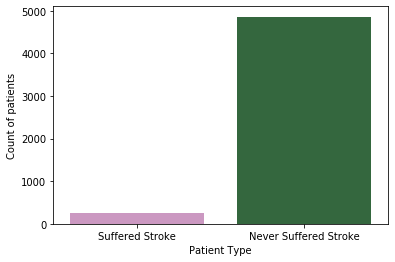

In [9]:
value = randint(0, len(colors)-1)

sns.countplot(x = 'stroke',palette = colors[value],data = StrokeAnalysis)

plt.xlabel("Patient Type")
plt.ylabel("Count of patients")

The number of patients who have suffered is very less as compared to the data with the ones who haven't suffered.

Text(0, 0.5, 'Count Of patients')

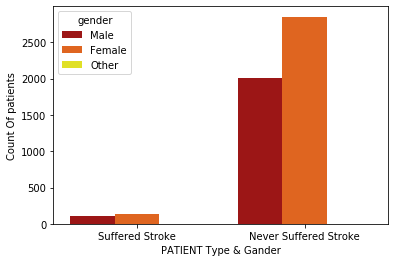

In [10]:
value = randint(0, len(colors)-1)

sns.countplot(x = 'stroke',hue = 'gender',palette = colors[value],data = StrokeAnalysis)

plt.xlabel("PATIENT Type & Gander")
plt.ylabel("Count Of patients")

THERe is majority of female patients.

Text(0, 0.5, 'Count by Gender')

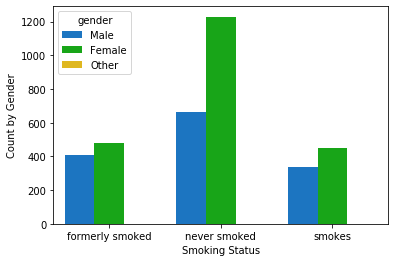

In [11]:
value = randint(0, len(colors)-1)

sns.countplot(x = StrokeAnalysis[StrokeAnalysis['smoking_status'] != 'Unknown']['smoking_status'],hue = 'gender',
             
                  palette = colors[value],data = StrokeAnalysis)


plt.xlabel('Smoking Status')
plt.ylabel("Count by Gender")

A large portion of patients have never smoking in their lifetime, majority being women.

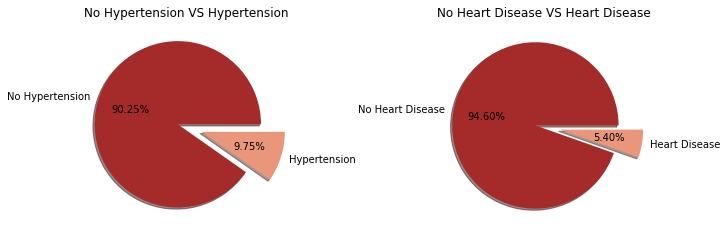

In [12]:
plt.figure(figsize=(10,5))
placement = 1

for i in ['hypertension','heart_disease']:
    label = []
    value = []
    for j in range(len(StrokeAnalysis[i].value_counts().index)):
        label.append(StrokeAnalysis[i].value_counts().index[j])
        value.append(StrokeAnalysis[i].value_counts()[j])
        
    plt.subplot(1,2,placement)    
    explode = (0.1, 0.2)
    plt.pie(value, labels = label,autopct='%1.2f%%',colors=['brown','darksalmon'],shadow=True,explode=explode)
    plt.title("{} VS {}".format(label[0],label[1]))
    placement += 1
    
plt.tight_layout(pad=0.4)   

The propotion of patients with hypertension and heart diseses are very low

TypeError: list indices must be integers or slices, not list

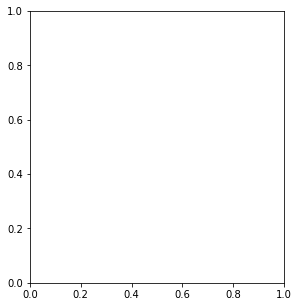

In [13]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)  
sns.countplot(x = 'age', hue = 'hypertension',
            palette = colors[value],data = StrokeAnalysis)

plt.xlabel("Hypertension")
plt.ylabel("Count by age")

plt.subplot(1,2,2)  
sns.countplot(x = 'age', hue = 'heart_disease',
            palette = colors[value],data = StrokeAnalysis)

plt.xlabel("Heart Disease")
plt.ylabel("Count by age")

plt.tight_layout(pad=0.4)

we observve that patients between the age of 0-18 do not suffer
from hypertension or any underlying heart condition whereeas patients
above 18 yers of age may be suffering from either hypertension,
heart counditions, or both.

In [ ]:
value = randint(0, len(colors)-1)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)  
sns.countplot(x = 'work_type', hue = 'hypertension',
            palette = colors[value],data = StrokeAnalysis)

plt.xlabel("Hypertension")
plt.ylabel("Count by age")

plt.subplot(1,2,2)  
sns.countplot(x = 'work_type', hue = 'heart_disease',
            palette = colors[value],data = StrokeAnalysis)

plt.xlabel("Heart Disease")
plt.ylabel("Count by age")

plt.tight_layout(pad=0.4)   



Children and patients who have never worked are likely not to sufer
from any underlying conditions.

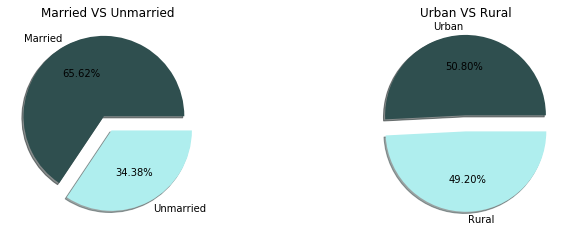

In [15]:
plt.figure(figsize=(10,6))
placement = 1

for i in ['ever_married','Residence_type']:
    label = []
    value = []
    for j in range(len(StrokeAnalysis[i].value_counts().index)):
        label.append(StrokeAnalysis[i].value_counts().index[j])
        value.append(StrokeAnalysis[i].value_counts()[j])
        
    plt.subplot(2,2,placement)    
    explode = (0.1, 0.1)
    plt.pie(value, labels = label,autopct='%1.2f%%',colors=['darkslategrey','paleturquoise'],shadow=True,explode=explode)
    plt.title("{} VS {}".format(label[0],label[1]))
    placement += 1
    
plt.tight_layout(pad=0.4)    

We see the numer of patients married are much more.Then proportion of rural and urban patients are almoust equal.

Text(0, 0.5, 'Count by Marital Status')

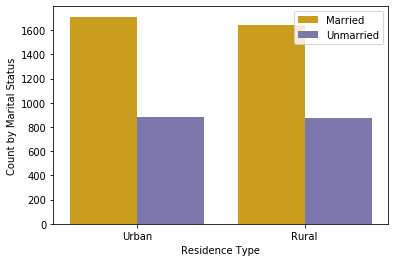

In [17]:
value  = randint(0, len(colors)-1)

sns.countplot(x = 'Residence_type', hue = 'ever_married', palette = colors[value],data = StrokeAnalysis)
plt.legend(StrokeAnalysis['ever_married'].unique(),loc ='upper right')
plt.xlabel("Residence Type")
plt.ylabel("Count by Marital Status")

There is no difference in the marriage rate between rural and urban areas.

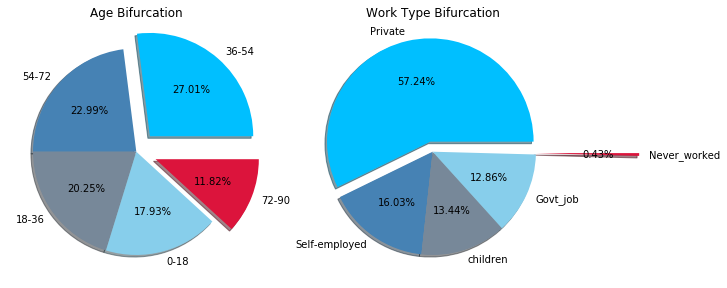

In [20]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1) 
label = StrokeAnalysis['age'].value_counts().index
value = StrokeAnalysis['age'].value_counts().values
explode = (0.2,0,0,0,0.2)
plt.pie(value, labels = label,autopct='%1.2f%%',colors=['deepskyblue','steelblue','lightslategrey','skyblue','crimson'],shadow=True,explode=explode)
plt.title("Age Bifurcation")

plt.subplot(1,2,2)  
label = StrokeAnalysis['work_type'].value_counts().index
value = StrokeAnalysis['work_type'].value_counts().values
explode = (0.1,0,0,0,1)
plt.pie(value, labels = label,autopct='%1.2f%%',colors=['deepskyblue','steelblue','lightslategrey','skyblue','crimson'],shadow=True,explode=explode)
plt.title("Work Type Bifurcation")

plt.tight_layout(pad=0.4)    

The majority of our patients belong to the age category of 36-54 and most of them work in private sectors

Text(0, 0.5, 'Count by Body Mass Index')

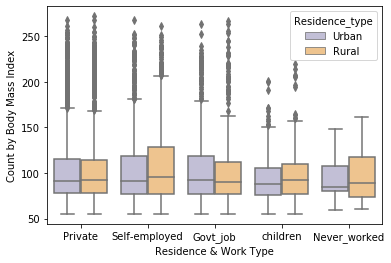

In [23]:
value = randint(0, len(colors)-1)

sns.boxplot(x = 'work_type', y = 'avg_glucose_level', hue = 'Residence_type',palette = colors[value],data = StrokeAnalysis)
plt.xlabel("Residence & Work Type")
plt.ylabel("Count by Body Mass Index")

Due to the number of outliers, it becomes very to analyze the data, thus it is necessary to handle these outliers.

Text(3.674999999999997, 0.5, 'Average Glucose Level')

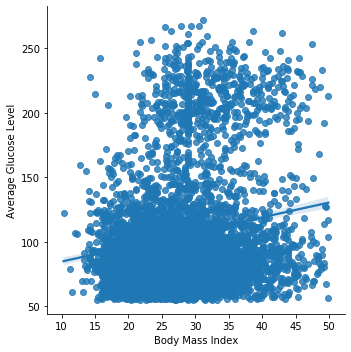

In [27]:
value = randint(0, len(colors)-1)

StrokeAnalysis = StrokeAnalysis[StrokeAnalysis['bmi']<50]
sns.lmplot(x = 'bmi', y = 'avg_glucose_level',palette = colors[value],data = StrokeAnalysis)
plt.xlabel("Body Mass Index")
plt.ylabel("Average Glucose Level")

There is no determinatic relationship between Body Mass Index and
Average Glucose Level . We have temporarily dealt with the outliers
to identify a realtionship between them. it is always advisable to deal
with these outliers before we train a prediction model.

# Summary of Analysis

. Data for patients suffering from a stroke are much lesser then
those who have not suffered s stoke. This imbalance would
cause our model to make a wrongful prediction, therefore we will
balance our data before data modeling 

. A ajor portion of the patients are women ans its is observed that
these patients have not suffered any stoke in the past.

. As compared to males many female patients do not smokoe. The 
probable reason being that the data captured have a majority of 
female records.


It is observed that patients who formerly smoked are little higher than those who currently continue smoking
As per the data patients suffering from hypertension and heart diseases are only 9.75% and 5.40% respectively
Patients between the age of 0-18 do not suffer from any conditions, specifically hypertension and heart diseases
As a patient grows older it is observed that hypertension due to work-related stress may increase, also creating room for heart diseases
We see that the patients working for private sectors are exposed to higher stress levels than the rest of the working class
Children and patients who have never worked may not be suffering from any underlying conditions.
There is a very minor difference in the proportion of patients living in urban/rural areas. Whereas a majority of patients have been married (Current marital status unknown)
The majority of our patients below to a private working class and are between the ages of 36-54.
A very less portion of our patients has never worked. Also, a very less portion of our patients are senior citize

# Data Modeling

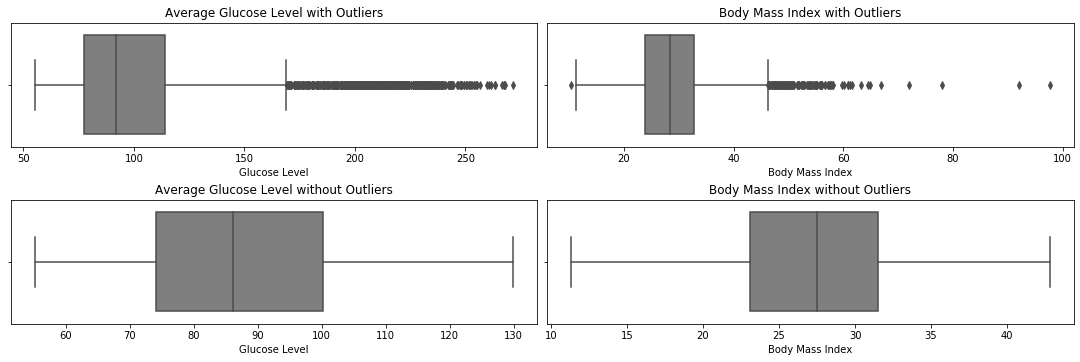

In [30]:
value = randint(0, len(colors)-1)
plt.figure(figsize=(15,5))

plt.subplot(2,2,1)
plt.title("Average Glucose Level with Outliers")
sns.boxplot(x = Data['avg_glucose_level'],palette = colors[value])
plt.xlabel("Glucose Level")

plt.subplot(2,2,2)
plt.title("Body Mass Index with Outliers")
sns.boxplot(x = Data['bmi'],palette = colors[value])
plt.xlabel("Body Mass Index")

plt.subplot(2,2,3)
plt.title("Average Glucose Level without Outliers")
Data = Data[Data['avg_glucose_level'] < 130] 
sns.boxplot(x = Data['avg_glucose_level'],palette = colors[value])
plt.xlabel("Glucose Level")

plt.subplot(2,2,4)
plt.title("Body Mass Index without Outliers")
Data = Data[(Data['bmi'] > 10.3) & (Data['bmi'] < 43)] 
sns.boxplot(x = Data['bmi'],palette = colors[value])
plt.xlabel("Body Mass Index")

plt.tight_layout(pad=0.6)

Having outliers in the dataset guides the algorithm onto making 
wrong pprediction, that seem just right to the predictive model.
Therefore we have eliminated the outliers using a graphical methord.

In [32]:
encoder = LabelEncoder()

column = ['gender', 'age', 'hypertension', 'ever_married','work_type', 'Residence_type', 'smoking_status']

for i in column:
    Data[i] = encoder.fit_transform(Data[i])
    
Data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,1,4,0,1,1,2,0,105.92,32.5,2,1
6,53882,1,4,1,1,1,2,0,70.09,27.4,2,1
7,10434,0,3,0,0,0,2,1,94.39,22.8,2,1
8,27419,0,3,0,0,1,2,0,76.15,28.9,0,1
9,60491,0,4,0,0,1,2,1,58.57,24.2,0,1


In [33]:
majority = Data[Data['stroke'] == 0]
minority = Data[Data['stroke'] == 1]


upsampled = resample(minority, replace=True, n_samples=len(majority))

As we had noted in our analysis our deataset is high imbalencd.
Therfore we use the method of resample() to duplicate the records
of the class- Suffered from a stroke. we duplicate these calss
records such they match up to the number of records of class-Not suffered from a strokr.

In [34]:
StrokeData = pd.concat([majority,upsampled])
strokeData = StrokeData.sample(frac=1).reset_index(drop=True)
StrokeData.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,30669,1,0,0,0,0,4,0,95.12,18.0,0,0
250,30468,1,3,1,0,1,2,1,87.96,39.2,2,0
251,16523,0,0,0,0,0,2,1,110.89,17.6,0,0
252,56543,0,3,0,0,1,2,0,69.04,35.9,1,0
255,52800,0,2,0,0,1,2,1,77.59,17.7,1,0


it is necessary to shuffle our data such that the algorithms csn learn
different records as it is served as an input. Once the dataset is 
shuffled we are good to go.

In [35]:
X = StrokeData.drop(['id','stroke'],axis=1)
y = StrokeData['stroke']

DataModels = pd.DataFrame()

In [37]:
def TrainandTestwithMinMaxScalar(X,y,algorithm,modelname):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    norm = MinMaxScaler().fit(X_train)

    X_train = norm.transform(X_train)

    X_test = norm.transform(X_test)

    model = algorithm
    model.fit(X_train, y_train)

    prediction = model.predict(X_test)

    score = round((accuracy_score(y_test, prediction)*100),2)
    print("\nModel Score:",score,"%")
    print("Precision:", precision_score(y_test, prediction))
    print("Recall:", recall_score(y_test, prediction))
    print("F1 score:", f1_score(y_test, prediction))
    print("ROC-AUC score:", roc_auc_score(y_test, prediction))
    print("Confusion Matrix:\n", confusion_matrix(y_test, prediction))
    print()
    
    model = {}
    
    model['Algorithm'] = modelname
    model['Model Score'] = str(score) + "%"
    model['Precision'] = round(precision_score(y_test, prediction),2)
    model['Recall'] = round(recall_score(y_test, prediction),2)
    model['F1 score'] = round(f1_score(y_test, prediction),2)
    model['ROC-AUC score'] = round(roc_auc_score(y_test, prediction),2)
    
    return model

In [38]:
algorithms = {"Random Forest":RandomForestClassifier(),"Decision Tree":DecisionTreeClassifier(),
              "Logistic Regression":LogisticRegression(),"K-Nearest Neighbour":KNeighborsClassifier(n_neighbors=3),
              "Support Vector Classifier":SVC()}

for i,j in algorithms.items():
    print("Algorithm Performance: {}".format(i))
    
    model = TrainandTestwithMinMaxScalar(X,y,j,i)
    DataModels = DataModels.append(model,ignore_index=True)
    
    print()   

Algorithm Performance: Random Forest

Model Score: 99.29 %
Precision: 0.9856020942408377
Recall: 1.0
F1 score: 0.9927488464073829
ROC-AUC score: 0.993099121706399
Confusion Matrix:
 [[786  11]
 [  0 753]]


Algorithm Performance: Decision Tree

Model Score: 98.45 %
Precision: 0.969270166453265
Recall: 1.0
F1 score: 0.9843953185955787
ROC-AUC score: 0.9848675914249685
Confusion Matrix:
 [[769  24]
 [  0 757]]


Algorithm Performance: Logistic Regression

Model Score: 77.55 %
Precision: 0.7453051643192489
Recall: 0.8289817232375979
F1 score: 0.7849196538936959
ROC-AUC score: 0.7760980044759418
Confusion Matrix:
 [[567 217]
 [131 635]]


Algorithm Performance: K-Nearest Neighbour

Model Score: 95.87 %
Precision: 0.9227985524728589
Recall: 1.0
F1 score: 0.9598494353826852
ROC-AUC score: 0.9592356687898089
Confusion Matrix:
 [[721  64]
 [  0 765]]


Algorithm Performance: Support Vector Classifier

Model Score: 82.45 %
Precision: 0.7946635730858469
Recall: 0.8782051282051282
F1 score: 0.834

In [39]:
DataModels.sort_values(by='F1 score', ascending=False)

,Algorithm,F1 score,Model Score,Precision,ROC-AUC score,Recall
0,Random Forest,0.99,99.29%,0.99,0.99,1.00
1,Decision Tree,0.98,98.45%,0.97,0.98,1.00
3,K-Nearest Neighbour,0.96,95.87%,0.92,0.96,1.00
4,Support Vector Classifier,0.83,82.45%,0.79,0.82,0.88
2,Logistic Regression,0.78,77.55%,0.75,0.78,0.83


Random Forest and Decision Tree have high precision. The number of
false-positive is better handled by Random Forest.Therefore we
can use Random Forest to predict whether or not a patient will
suffer from a stroke or not.